<a href="https://colab.research.google.com/github/pranjal2234/Hotel-Bookings/blob/main/Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing files
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the csv file from google drive
bookings = pd.read_csv("/content/drive/MyDrive/Data/hotel_bookings.csv")
bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [105]:
#Size of the dataset
bookings.shape

(6797, 34)

**Handling the missing values**

In [5]:
#Checking for null values
bookings.isnull().sum()*100/bookings.shape[0]

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [ ]:
#Deleting the company column as it has most of the values as null
bookings= bookings.drop(columns= "company")
bookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
#Replacing null values with appropriate values drop the required one
bookings.country.fillna("others",inplace = True)
bookings.agent.fillna(0,inplace = True)
bookings.dropna(inplace=True)

In [12]:
#Sum of the null values by column
bookings.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

**Checking for duplicate values**

In [104]:
bookings[bookings.duplicated()].shape

(1538, 34)

In [ ]:
bookings.drop_duplicates(inplace = True)

In [103]:
#Shape of the new dataset
bookings.shape

(6797, 34)

In [ ]:
bookings[bookings['adults']+bookings['babies']+bookings['children'] == 0].shape

(166, 31)

In [ ]:
bookings.drop(bookings[bookings['adults']+bookings['babies']+bookings['children'] == 0].index, inplace = True)

In [14]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6797 entries, 18 to 119248
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           6797 non-null   object 
 1   is_canceled                     6797 non-null   int64  
 2   lead_time                       6797 non-null   int64  
 3   arrival_date_year               6797 non-null   int64  
 4   arrival_date_month              6797 non-null   object 
 5   arrival_date_week_number        6797 non-null   int64  
 6   arrival_date_day_of_month       6797 non-null   int64  
 7   stays_in_weekend_nights         6797 non-null   int64  
 8   stays_in_week_nights            6797 non-null   int64  
 9   adults                          6797 non-null   int64  
 10  children                        6797 non-null   float64
 11  babies                          6797 non-null   int64  
 12  meal                           

In [96]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
bookings[['children', 'agent']] = bookings[['children',  'agent']].astype('int64')

In [97]:
# changing datatype of column 'reservation_status_date' to data_type.
bookings['reservation_status_date'] = pd.to_datetime(bookings['reservation_status_date'], format = '%Y-%m-%d')

In [98]:
# Adding total persons staying days in hotels
bookings['total_stay'] = bookings['stays_in_weekend_nights']+bookings['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
bookings['total_person'] = bookings['adults']+bookings['children']+bookings['babies']

**Analysis**



In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
#data = pd.DataFrame(bookings['agent'].value_counts()).reset_index()
#data.head()

,index,agent
0,0.0,6580
1,185.0,78
2,334.0,28
3,9.0,27
4,250.0,9


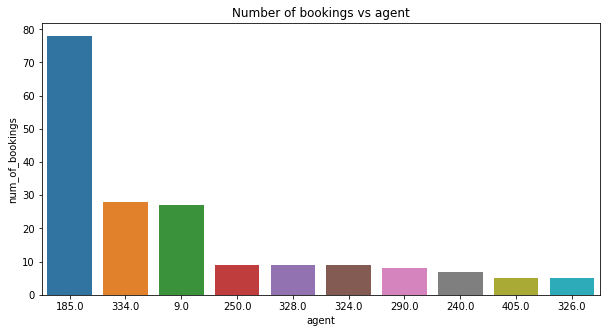

In [51]:
data = pd.DataFrame(bookings['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
data.drop(data[data['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
data = data[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
plt.title("Number of bookings vs agent")
sns.barplot(x = 'agent', y = 'num_of_bookings', data = data, order = data.sort_values('num_of_bookings', ascending = False).agent)

In [56]:
data.head()

,agent,num_of_bookings
1,185.0,78
2,334.0,28
3,9.0,27
4,250.0,9
5,328.0,9


Most of the bookings are done through agent number 185 followed by 334

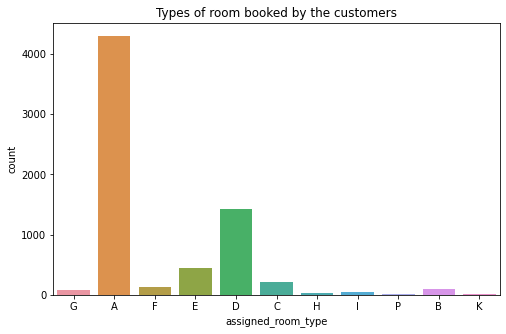

In [89]:
plt.figure( figsize=(8, 5))

sns.countplot(x = bookings['assigned_room_type'])
plt.title("Types of room booked by the customers")
plt.show()

**Conclusion :**Most booked room type is A

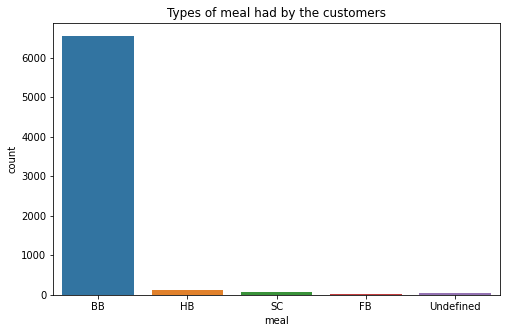

In [90]:
plt.figure( figsize=(8, 5))

sns.countplot(x = bookings['meal'])
plt.title("Types of meal had by the customers")
plt.show()

**Conclusion :** BB type of meal is mostly preferred by the people.

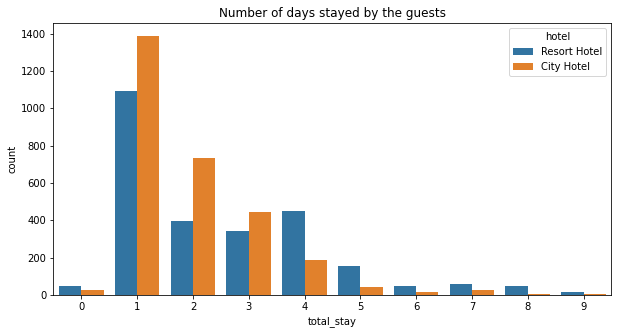

In [101]:
stayed = bookings[bookings['is_canceled'] == 0]
stayed_less_than_10 = stayed[stayed['total_stay'] < 10]
plt.figure(figsize = (10,5))
plt.title("Number of days stayed by the guests")
sns.countplot(x = stayed_less_than_10['total_stay'], hue = stayed_less_than_10['hotel'])
plt.show()

**Conclusion :**Most of the people have stayed for 1 day. And city hotels are preferred much than Resort hotel

In [102]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = bookings[bookings['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = bookings.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,784,3689,21.25
Resort Hotel,407,3108,13.10


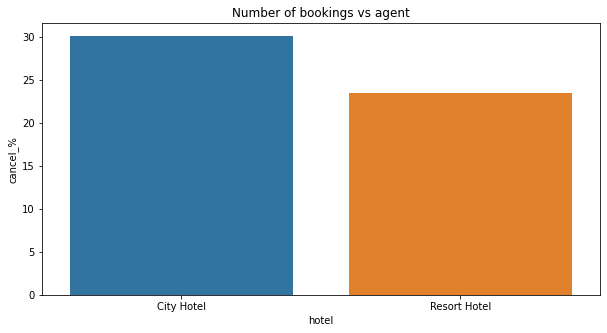

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.title("Number of bookings vs agent")
plt.show()

**Conclusion :**Almost 30 % of City Hotel bookings got canceled.

 **Repeated Guests** 

In [106]:
# Selecting and counting repeated customers bookings
repeated_data = bookings[bookings['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)
D3

,total_repeated_guests,total_bookings,repeat_%
hotel,,,
City Hotel,1137,3689,30.82
Resort Hotel,533,3108,17.15


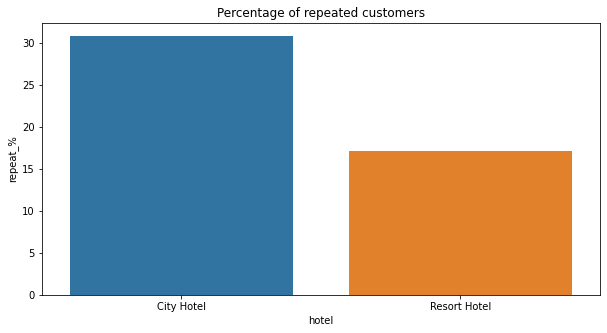

In [107]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.title("Percentage of repeated customers")
plt.show()

**Conclusion :** Around 15% of the customers are repeated customers in Resort Hotels and 31% in City Hotels.

Text(0.5, 1.0, 'Booking % by distribution channels')

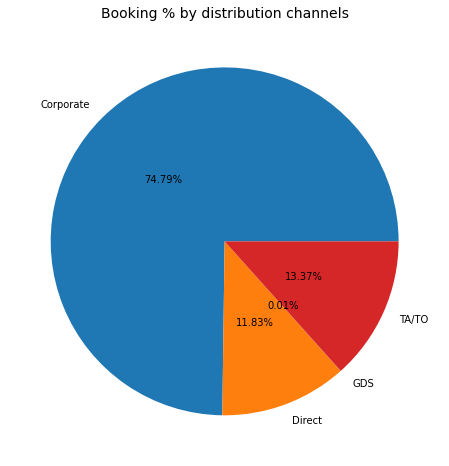

In [109]:
group_by_dc = bookings.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/bookings.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14)

**Conclusion :**Around 75% of the bookings are done through TA/TO(travel agencies and travel organisations)

In [110]:
import numpy as np

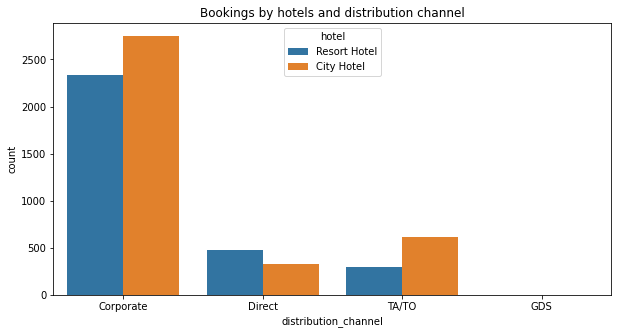

In [113]:
plt.figure(figsize = (10,5))
plt.title("Bookings by hotels and distribution channel")
sns.countplot(x = bookings['distribution_channel'], hue = bookings['hotel'])
plt.show()

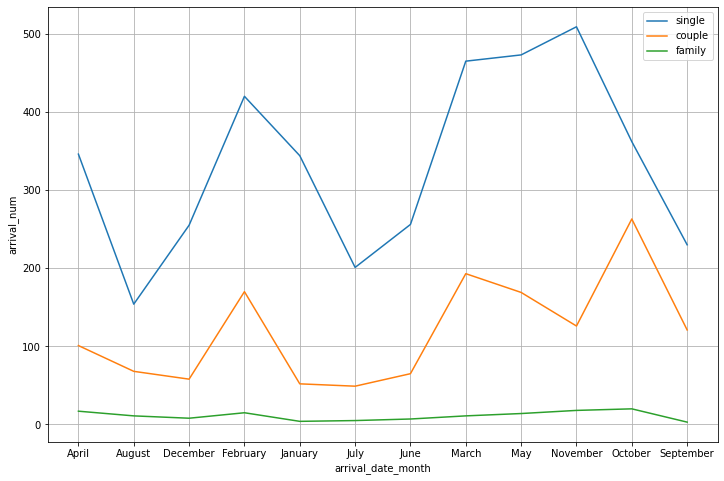

In [122]:
## Select single, couple, multiple adults and family
single   =  stayed[(stayed['adults']==1) & (stayed['children']==0) & (stayed['babies']==0)]
couple   = stayed[(stayed['adults']==2) & (stayed['children']==0) & (stayed['babies']==0)]
family   = stayed[stayed['adults'] + stayed['children'] + stayed['babies'] > 2]

reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

fig, ax = plt.subplots(figsize=(12, 8))

for type in ['single', 'couple', 'family']:
  d1 = eval(type).groupby(['arrival_date_month']).size().reset_index().rename(columns = {0:'arrival_num'})
  sns.lineplot(data=d1, x= 'arrival_date_month', y='arrival_num', label=type, ax=ax)
  
plt.grid()
plt.show()

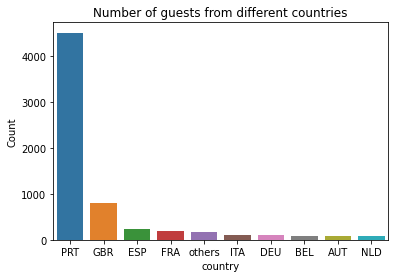

In [123]:
grouped_by_country = bookings.groupby('country')
data = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = data['country'], y  = data['Count'])
plt.title("Number of guests from different countries")
plt.show()

**Conclusion :** Most of the guests are from PRT(Portugal)